In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
results = pd.read_csv("/content/ODI_Results_2015_2023.csv")
results.head()

,Start Date,Team 1,Team 2,Winner,Result,Margin,Ground
0,08-Jan-15,Afghanistan,Scotland,Afghanistan,won,8 wickets,ICCA Dubai
1,10-Jan-15,Afghanistan,Ireland,Ireland,won,3 wickets,Dubai (DSC)
2,11-Jan-15,New Zealand,Sri Lanka,New Zealand,won,3 wickets,Christchurch
3,14-Jan-15,Afghanistan,Scotland,Scotland,won,150 runs,Abu Dhabi
4,15-Jan-15,New Zealand,Sri Lanka,Sri Lanka,won,6 wickets,Hamilton


In [ ]:
unique_values = results['Winner'].unique()
print(unique_values)

['Afghanistan' 'Ireland' 'New Zealand' 'Scotland' 'Sri Lanka' 'Australia'
 'South Africa' nan 'England' 'West Indies' 'India' 'Bangladesh'
 'Pakistan' 'Zimbabwe' 'Hong Kong' 'Netherlands' 'Nepal']


In [ ]:
results['Winner'].fillna("No result", inplace=True)

In [ ]:
# This is a list of cricket teams participating in the world cup
worldcup_teams = ['England', 'South Africa', 'Netherlands',
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan',
            'Australia', 'Bangladesh', 'India']

df_teams_1 = results[results['Team 1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team 2'].isin(worldcup_teams)]

df_teams = pd.concat((df_teams_1, df_teams_2))

df_teams.drop_duplicates()

df_teams.count()

Start Date    1333
Team 1        1333
Team 2        1333
Winner        1333
Result        1333
Margin        1333
Ground        1333
dtype: int64

In [ ]:
df_teams

,Start Date,Team 1,Team 2,Winner,Result,Margin,Ground
0,08-Jan-15,Afghanistan,Scotland,Afghanistan,won,8 wickets,ICCA Dubai
1,10-Jan-15,Afghanistan,Ireland,Ireland,won,3 wickets,Dubai (DSC)
2,11-Jan-15,New Zealand,Sri Lanka,New Zealand,won,3 wickets,Christchurch
3,14-Jan-15,Afghanistan,Scotland,Scotland,won,150 runs,Abu Dhabi
4,15-Jan-15,New Zealand,Sri Lanka,Sri Lanka,won,6 wickets,Hamilton
...,...,...,...,...,...,...,...
827,01-Aug-23,West Indies,India,India,won,200 runs,Tarouba
828,22-Aug-23,Afghanistan,Pakistan,Pakistan,won,142 runs,Hambantota
829,24-Aug-23,Afghanistan,Pakistan,Pakistan,won,1 wickets,Hambantota
830,26-Aug-23,Afghanistan,Pakistan,Pakistan,won,59 runs,Colombo (RPS)


In [ ]:
df_final = df_teams.drop(['Start Date','Margin', 'Ground','Result'], axis=1)
df_final.head()

,Team 1,Team 2,Winner
0,Afghanistan,Scotland,Afghanistan
1,Afghanistan,Ireland,Ireland
2,New Zealand,Sri Lanka,New Zealand
3,Afghanistan,Scotland,Scotland
4,New Zealand,Sri Lanka,Sri Lanka


In [ ]:
df_final.isna().sum()

Team 1    0
Team 2    0
Winner    0
dtype: int64

In [ ]:
df_final = df_final.reset_index(drop=True)

# Setting 1 in 'winning_team' column for rows where the 'Winner' column is the same as the 'Team 1' column.
df_final.loc[df_final.Winner == df_final['Team 1'], 'winning_team'] = 1

# Setting 2 in 'winning_team' column for rows where the 'Winner' column is the same as the 'Team 2' column.
df_final.loc[df_final.Winner == df_final['Team 2'], 'winning_team'] = 2

df_final = df_final.drop(['winning_team'], axis=1)

df_final.head()

,Team 1,Team 2,Winner
0,Afghanistan,Scotland,Afghanistan
1,Afghanistan,Ireland,Ireland
2,New Zealand,Sri Lanka,New Zealand
3,Afghanistan,Scotland,Scotland
4,New Zealand,Sri Lanka,Sri Lanka


# **Performing one-hot encoding**

In [ ]:
final = pd.get_dummies(df_final, prefix=['Team 1', 'Team 2'], columns=['Team 1', 'Team 2'])

In [ ]:
X = final.drop(['Winner'], axis=1)
y = final["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
final.head()

,Winner,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,Team 1_Namibia,Team 1_Nepal,...,Team 2_New Zealand,Team 2_Oman,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,Afghanistan,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Ireland,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,New Zealand,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Scotland,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Sri Lanka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

score = mlp.score(X_train, y_train)
score2 = mlp.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.685
Test set accuracy:  0.618


In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0)

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.688
Test set accuracy:  0.655


# **Predicting Fixture Matches**

In [ ]:
ranking = pd.read_csv('/content/ICC_rankings.csv')
fixtures = pd.read_csv('/content/Fixtures.csv')

predictions = []

In [ ]:
# Inserting Team rankings to fixtures dataframe based on 'Team 1' and 'Team 2' columns.
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team_name')['Team_ranking']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team_name')['Team_ranking']))

fixtures = fixtures.iloc[:45, :]
fixtures.head()

,Unnamed: 0,first_position,second_position,Date,Location,Team_1,Team_2
0,0,6.0,5.0,05-10-2023,"Narendra Modi Stadium, Ahmedabad",England,New Zealand
1,1,4.0,14.0,06-10-2023,"Rajiv Gandhi International Stadium, Hyderabad",Pakistan,Netherlands
2,2,9.0,8.0,07-10-2023,"Himachal Pradesh Cricket Association Stadium, ...",Afghanistan,Bangladesh
3,3,3.0,7.0,07-10-2023,"Arun Jaitley Stadium, Delhi",South Africa,Sri Lanka
4,4,2.0,1.0,08-10-2023,"MA Chidambaram Stadium, Chennai",Australia,India


In [ ]:
fixtures['first_position']=fixtures['first_position'].fillna(fixtures['first_position'].mean())
fixtures['second_position']=fixtures['second_position'].fillna(fixtures['second_position'].mean())
fixtures.head()

,Unnamed: 0,first_position,second_position,Date,Location,Team_1,Team_2
0,0,6.0,5.0,05-10-2023,"Narendra Modi Stadium, Ahmedabad",England,New Zealand
1,1,4.0,14.0,06-10-2023,"Rajiv Gandhi International Stadium, Hyderabad",Pakistan,Netherlands
2,2,9.0,8.0,07-10-2023,"Himachal Pradesh Cricket Association Stadium, ...",Afghanistan,Bangladesh
3,3,3.0,7.0,07-10-2023,"Arun Jaitley Stadium, Delhi",South Africa,Sri Lanka
4,4,2.0,1.0,08-10-2023,"MA Chidambaram Stadium, Chennai",Australia,India


In [ ]:
# Predicting winning teams based on positions in fixtures.
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        predictions.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        predictions.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})

In [ ]:
predictions = pd.DataFrame(predictions)
backup_predictions = predictions
predictions.head()

,Team_1,Team_2,winning_team
0,New Zealand,England,None
1,Pakistan,Netherlands,None
2,Bangladesh,Afghanistan,None
3,South Africa,Sri Lanka,None
4,India,Australia,None


In [ ]:
predictions = pd.get_dummies(predictions, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

missing_cols = set(final.columns) - set(predictions.columns)

for c in missing_cols:
    predictions[c] = 0
predictions = predictions[final.columns]

predictions = predictions.drop(['Winner'], axis=1)
predictions.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_England,Team 1_Hong Kong,Team 1_India,Team 1_Ireland,Team 1_Namibia,Team 1_Nepal,Team 1_Netherlands,...,Team 2_New Zealand,Team 2_Oman,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_U.A.E.,Team 2_U.S.A.,Team 2_West Indies,Team 2_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
predictions = rf.predict(predictions)
for i in range(fixtures.shape[0]):
    print(backup_predictions.iloc[i, 1] + " vs " + backup_predictions.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_predictions.iloc[i, 1])

    else:
        print("Winner: " + backup_predictions.iloc[i, 0])
    print("")

England vs New Zealand
Winner: New Zealand

Netherlands vs Pakistan
Winner: Pakistan

Afghanistan vs Bangladesh
Winner: Bangladesh

Sri Lanka vs South Africa
Winner: South Africa

Australia vs India
Winner: India

Netherlands vs New Zealand
Winner: New Zealand

Bangladesh vs England
Winner: England

Sri Lanka vs Pakistan
Winner: Pakistan

Afghanistan vs India
Winner: India

South Africa vs Australia
Winner: Australia

Bangladesh vs New Zealand
Winner: New Zealand

Pakistan vs India
Winner: India

Afghanistan vs England
Winner: England

Sri Lanka vs Australia
Winner: Australia

Netherlands vs South Africa
Winner: South Africa

Afghanistan vs New Zealand
Winner: New Zealand

Bangladesh vs India
Winner: India

Pakistan vs Australia
Winner: Australia

Netherlands vs Sri Lanka
Winner: Sri Lanka

England vs South Africa
Winner: South Africa

New Zealand vs India
Winner: India

Afghanistan vs Pakistan
Winner: Pakistan

Bangladesh vs South Africa
Winner: South Africa

Netherlands vs Australia


# **Predicting Finalist Teams**

In [ ]:
def predict_winner(matches, ranking, final, rf):

    positions = []

    for match in matches:
        positions.append(ranking.loc[ranking['Team_name'] == match[0], 'Team_ranking'].iloc[0])
        positions.append(ranking.loc[ranking['Team_name'] == match[0], 'Team_ranking'].iloc[0])

    predictions = []

    i = 0
    j = 0

    while i < len(positions):
        dict1 = {}

        if positions[i] < positions[i + 1]:
            dict1.update({'Team 1': matches[j][0], 'Team 2': matches[j][1]})
        else:
            dict1.update({'Team 1': matches[j][1], 'Team 2': matches[j][0]})

        predictions.append(dict1)
        i += 2
        j += 1

    predictions = pd.DataFrame(predictions)

    backup_predictions = predictions

    predictions = pd.get_dummies(predictions, prefix=['Team 1', 'Team 2'], columns=['Team 1', 'Team 2'])

    missing_cols2 = set(final.columns) - set(predictions.columns)

    for c in missing_cols2:
        predictions[c] = 0

    predictions = predictions[final.columns]

    predictions = predictions.drop(['Winner'], axis=1)

    predictions = rf.predict(predictions)

    for i in range(len(predictions)):
        print(backup_predictions.iloc[i, 1] + " vs " + backup_predictions.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_predictions.iloc[i, 1])
        else:
            print("Winner: " + backup_predictions.iloc[i, 0])
        print("")



In [ ]:
semi_teams = [('India', 'New Zealand'),
        ('Australia', 'South Africa')]

In [ ]:
predict_winner(semi_teams, ranking, final, rf)

India vs New Zealand
Winner: New Zealand

Australia vs South Africa
Winner: South Africa



# **New Zealand Team**

In [ ]:
new_zealand_df = pd.read_excel('/content/New Zealand Squad.xlsx')
new_zealand_df

,Player Type,Player Name,Match-1 (Ahmedabad),Match-2 (Hyderabad),Match-3 (Chennai),Match-4 (Chennai),Match-5 (Dharamsala),Match-6 (Dharamsala),Match-7 (Pune),Match-8 (Bengaluru),Match-9 (Bengaluru)
0,Batter,Devon Conway,P,P,P,P,P,P,P,P,P
1,Batter,Rachin Ravindra,P,P,P,P,P,P,P,P,P
2,Batter,Darly Mitchell,P,P,P,P,P,P,P,P,P
3,Batter,Tom Latham,P,P,P,P,P,P,P,P,P
4,Batter,Glenn Phillips,P,P,P,P,P,P,P,P,P
5,Bowler,Trent Boult,P,P,P,P,P,P,P,P,P
6,Bowler,Mitchell Santner,P,P,P,P,P,P,P,P,P
7,Batter,Kane Williamson,A,A,P,A,A,A,A,P,P
8,Batter,Mark Chapman,P,P,P,P,P,A,A,P,P
9,Bowler,Lockie Ferguson,A,P,A,P,P,P,A,A,P


In [ ]:
batter_df = new_zealand_df[new_zealand_df['Player Type'] == 'Batter']
bowler_df = new_zealand_df[new_zealand_df['Player Type'] == 'Bowler']

In [ ]:
batter = batter_df[['Player Name'] + [col for col in new_zealand_df.columns if 'Match-' in col]]

label_encoder = LabelEncoder()
batter_new = batter.apply(lambda col: label_encoder.fit_transform(col) if col.name != 'Player Name' else col)

batter_new.T

,0,1,2,3,4,7,8,11,12
Player Name,Devon Conway,Rachin Ravindra,Darly Mitchell,Tom Latham,Glenn Phillips,Kane Williamson,Mark Chapman,Will Young,James Neesham
Match-1 (Ahmedabad),1,1,1,1,1,0,1,1,1
Match-2 (Hyderabad),1,1,1,1,1,0,1,1,0
Match-3 (Chennai),1,1,1,1,1,1,1,0,1
Match-4 (Chennai),1,1,1,1,1,0,1,1,0
Match-5 (Dharamsala),1,1,1,1,1,0,1,1,0
Match-6 (Dharamsala),1,1,1,1,1,0,0,1,1
Match-7 (Pune),1,1,1,1,1,0,0,1,1
Match-8 (Bengaluru),1,1,1,1,1,1,1,0,0
Match-9 (Bengaluru),1,1,1,1,1,1,1,0,0


In [ ]:
bowler = bowler_df[['Player Name'] + [col for col in new_zealand_df.columns if 'Match-' in col]]

label_encoder = LabelEncoder()
bowler_new = bowler.apply(lambda col: label_encoder.fit_transform(col) if col.name != 'Player Name' else col)

bowler_new.T

,5,6,9,10,13,14,15
Player Name,Trent Boult,Mitchell Santner,Lockie Ferguson,Tim Southee,Matt Henry,Ish Sodhi,Kyle Jamieson
Match-1 (Ahmedabad),1,1,0,0,1,0,0
Match-2 (Hyderabad),1,1,1,0,1,0,0
Match-3 (Chennai),1,1,0,0,1,0,0
Match-4 (Chennai),1,1,1,0,1,0,0
Match-5 (Dharamsala),1,1,1,0,1,0,0
Match-6 (Dharamsala),1,1,1,0,1,0,0
Match-7 (Pune),1,1,0,1,1,0,0
Match-8 (Bengaluru),1,1,0,1,0,1,0
Match-9 (Bengaluru),1,1,1,1,0,0,0


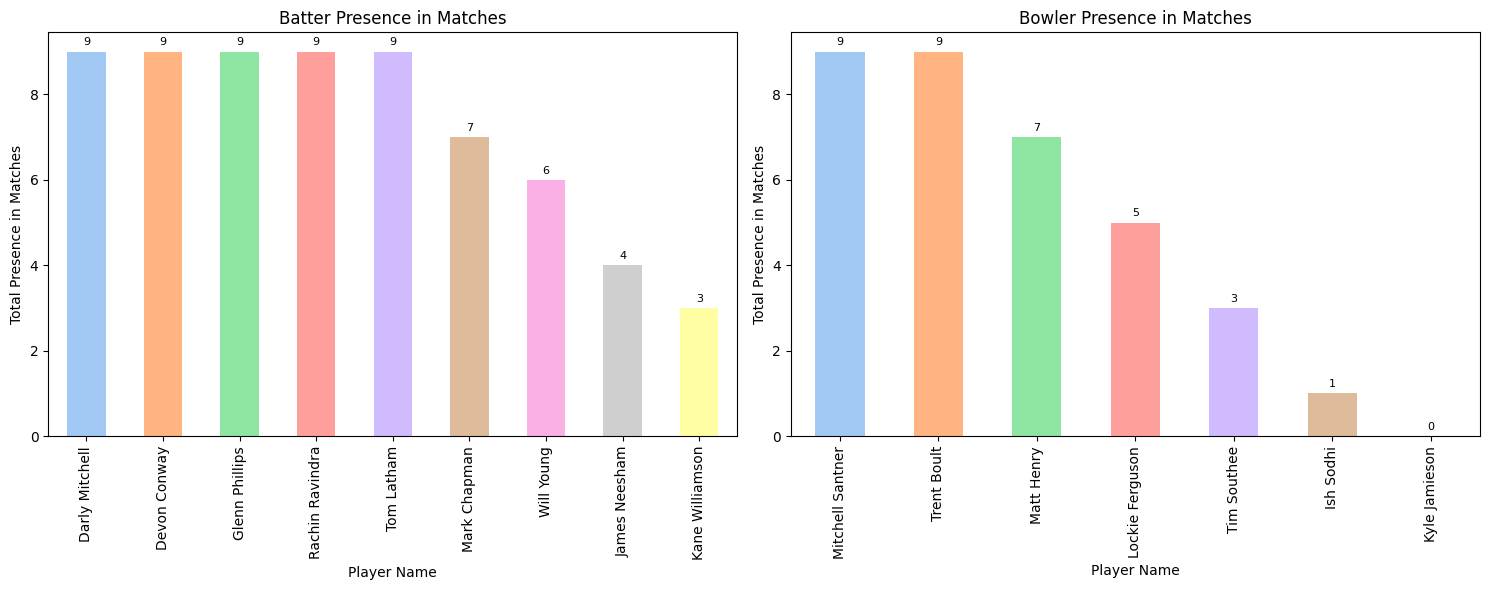

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for batters
batter_total_matches = batter_new.groupby('Player Name').sum().sum(axis=1)
batter_sorted = batter_total_matches.sort_values(ascending=False)
colors_batter = sns.color_palette("pastel", len(batter_sorted))

batter_plot = batter_sorted.plot(kind='bar', color=colors_batter, ax=ax1, legend=False)
batter_plot.set_title('Batter Presence in Matches')
batter_plot.set_xlabel('Player Name')
batter_plot.set_ylabel('Total Presence in Matches')

for i, v in enumerate(batter_sorted):
    batter_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for bowlers
bowler_total_matches = bowler_new.groupby('Player Name').sum().sum(axis=1)
bowler_sorted = bowler_total_matches.sort_values(ascending=False)
colors_bowler = sns.color_palette("pastel", len(bowler_sorted))

bowler_plot = bowler_sorted.plot(kind='bar', color=colors_bowler, ax=ax2, legend=False)
bowler_plot.set_title('Bowler Presence in Matches')
bowler_plot.set_xlabel('Player Name')
bowler_plot.set_ylabel('Total Presence in Matches')

for i, v in enumerate(bowler_sorted):
    bowler_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()

plt.show()

Darly Mitchell , Devon Conway , Glenn Philips , Rachin Ravindra , Tom Latham , Mark Chapman , Mitchell Santner , Trent Boult , Matt Henry are most likely to be in the playing 11 since they played more matches.

# **South Africa Team**

In [ ]:
south_africa_df = pd.read_excel('/content/South Africa Squad.xlsx')
south_africa_df

,Player Type,Player Name,Match-1 (Delhi),Match-2 (Lucknow),Match-3 (Dharamsala),Match-4 (Mumbai),Match-5 (Mumbai),Match-6 (Chennai),Match-7 (Pune),Match-8 (Kolkata),Match-9 (Ahmedabad)
0,Batter,Quinton de Kock,P,P,P,P,P,P,P,P,P
1,Batter,Rassie van der Dussen,P,P,P,P,P,P,P,P,P
2,Batter,Aiden Markram,P,P,P,P,P,P,P,P,P
3,Batter,Heinrich Klaasen,P,P,P,P,P,P,P,P,P
4,Batter,David Miller,P,P,P,P,P,P,P,P,P
5,Bowler,Keshav Maharaj,P,P,P,P,P,P,P,P,P
6,Batter,Temba Bavuma,P,P,P,A,A,P,P,P,P
7,Bowler,Lungi Ngidi,P,P,P,P,A,P,P,P,P
8,Bowler,Kagiso Rabada,P,P,P,P,P,A,P,P,P
9,Bowler,Marco Jansen,P,P,P,P,P,P,P,P,A


In [ ]:
batter_df = south_africa_df[south_africa_df['Player Type'] == 'Batter']
bowler_df = south_africa_df[south_africa_df['Player Type'] == 'Bowler']

In [ ]:
batter = batter_df[['Player Name'] + [col for col in south_africa_df.columns if 'Match-' in col]]

label_encoder = LabelEncoder()
batter_new = batter.apply(lambda col: label_encoder.fit_transform(col) if col.name != 'Player Name' else col)

batter_new.T

,0,1,2,3,4,6,14
Player Name,Quinton de Kock,Rassie van der Dussen,Aiden Markram,Heinrich Klaasen,David Miller,Temba Bavuma,Reeza Hendricks
Match-1 (Delhi),1,1,1,1,1,1,0
Match-2 (Lucknow),1,1,1,1,1,1,0
Match-3 (Dharamsala),1,1,1,1,1,1,0
Match-4 (Mumbai),1,1,1,1,1,0,1
Match-5 (Mumbai),1,1,1,1,1,0,1
Match-6 (Chennai),1,1,1,1,1,1,0
Match-7 (Pune),1,1,1,1,1,1,0
Match-8 (Kolkata),1,1,1,1,1,1,0
Match-9 (Ahmedabad),1,1,1,1,1,1,0


In [ ]:
bowler = bowler_df[['Player Name'] + [col for col in south_africa_df.columns if 'Match-' in col]]

label_encoder = LabelEncoder()
bowler_new = bowler.apply(lambda col: label_encoder.fit_transform(col) if col.name != 'Player Name' else col)

bowler_new.T

,5,7,8,9,10,11,12,13
Player Name,Keshav Maharaj,Lungi Ngidi,Kagiso Rabada,Marco Jansen,Gerald Coetzee,Andile Phehlukwayo,Lizaad Williams,Tabraiz Shamsi
Match-1 (Delhi),1,1,1,1,1,0,0,0
Match-2 (Lucknow),1,1,1,1,0,0,0,1
Match-3 (Dharamsala),1,1,1,1,1,0,0,0
Match-4 (Mumbai),1,1,1,1,1,0,0,0
Match-5 (Mumbai),1,0,1,1,1,0,1,0
Match-6 (Chennai),1,1,0,1,1,0,0,1
Match-7 (Pune),1,1,1,1,1,0,0,0
Match-8 (Kolkata),1,1,1,1,0,0,0,1
Match-9 (Ahmedabad),1,1,1,0,1,1,0,0


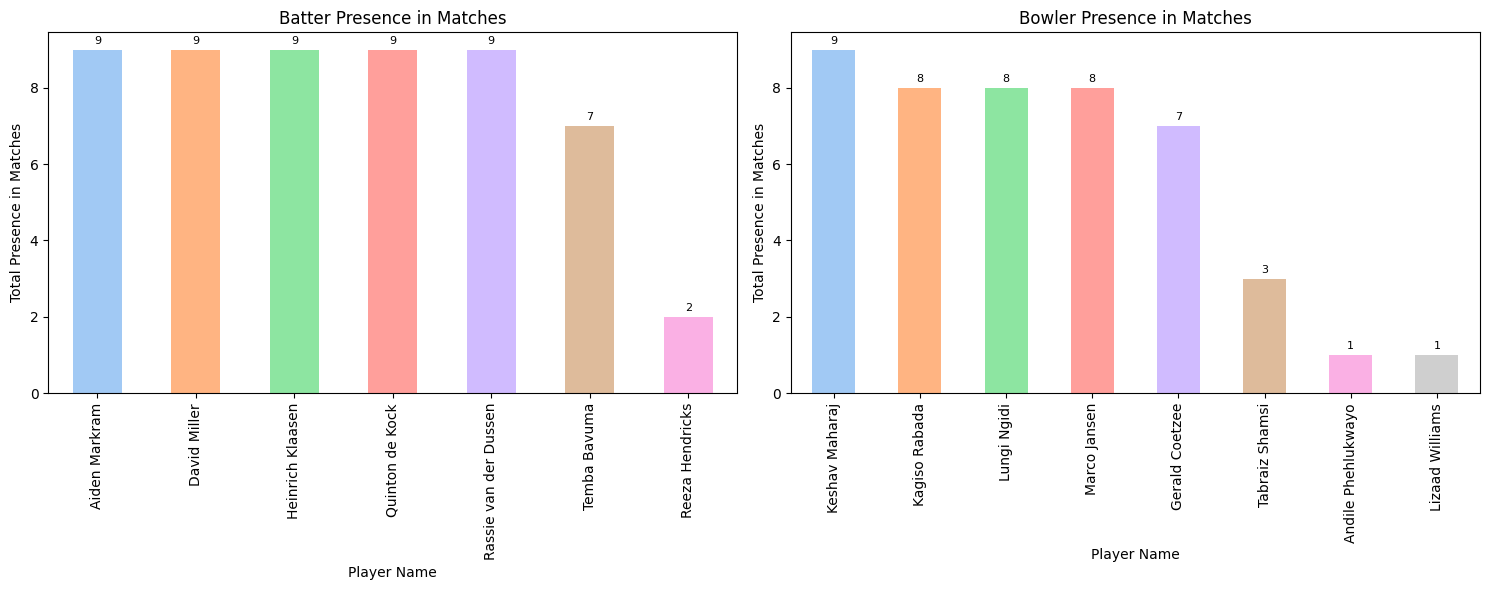

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for batters
batter_total_matches = batter_new.groupby('Player Name').sum().sum(axis=1)
batter_sorted = batter_total_matches.sort_values(ascending=False)
colors_batter = sns.color_palette("pastel", len(batter_sorted))

batter_plot = batter_sorted.plot(kind='bar', color=colors_batter, ax=ax1, legend=False)
batter_plot.set_title('Batter Presence in Matches')
batter_plot.set_xlabel('Player Name')
batter_plot.set_ylabel('Total Presence in Matches')

for i, v in enumerate(batter_sorted):
    batter_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for bowlers
bowler_total_matches = bowler_new.groupby('Player Name').sum().sum(axis=1)
bowler_sorted = bowler_total_matches.sort_values(ascending=False)
colors_bowler = sns.color_palette("pastel", len(bowler_sorted))

bowler_plot = bowler_sorted.plot(kind='bar', color=colors_bowler, ax=ax2, legend=False)
bowler_plot.set_title('Bowler Presence in Matches')
bowler_plot.set_xlabel('Player Name')
bowler_plot.set_ylabel('Total Presence in Matches')

for i, v in enumerate(bowler_sorted):
    bowler_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()

plt.show()

Aiden Markram, David Miller, Heinrich Klassen, Quinton de Kock, Rassie van Dussen, Temba Bavuma, Keshav Maharaj, Kagiso Rabada, Lungi Nigidi, Marco Jansen, Gerald Coetzee are likely to be in the playing 11.

# **Predicting WINNER**

In [ ]:
finalist_teams = [('New Zealand', 'South Africa')]

In [ ]:
predict_winner(finalist_teams, ranking, final, rf)

New Zealand vs South Africa
Winner: South Africa

